# 熱伝導方程式の数値解法
## 第二講:陰解法

本講義では熱伝導方程式を数値計算していきます。  



In [1]:
versioninfo()

Julia Version 1.5.0
Commit 96786e22cc (2020-08-01 23:44 UTC)
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
  CPU: Intel(R) Core(TM) i9-10900 CPU @ 2.80GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-9.0.1 (ORCJIT, skylake)


次は陰解法です。第一講で上げた画像を再渇します。  
<img src="fig1.png">  

離散化方程式も前回上げたものを再渇します。  

### 陰解法(後退オイラー法)

\begin{align*}
& \frac{U^{n+1}_i - U^{n}_i}{\Delta t}=\frac{K_0}{cρ} (\frac{U^{n+1}_{i+1} - 2U^{n+1}_{i}+U^{n+1}_{i-1}}{\Delta x^2})\tag{1}
\end{align*}

ここでは、陰解法の中でも完全陰解法と呼ばれるものについて記述します。  
より差分の精度を上げたクランクニコルソン法というものがありますが、  
これはまた後日やります。  

既知項を右に、未定項を左にまとめてみましょう。
ここでは先に、  
\begin{align*}
& \lambda = \frac{K_0 \Delta t}{cρ\Delta x^2} \tag{2}
\end{align*}
として、置いておきます。  
  
\begin{align*}
& - \lambda U^{n+1}_{i+1}+  (1+2\lambda)U^{n+1}_i - \lambda U^{n+1}_{i-1} = U^n_i \tag{3}
\end{align*}

さて、ここで連立方程式の行列記法を覚えていますか？  
http://www.eisaijuku.join-us.jp/renritu-houteishiki-no-gyoretu-kai.html  
こんな感じです。  
  
陰解法の行列は、以下のように作ります。(まだ境界条件がはいってないので未完成です。)
  
$$
\begin{pmatrix}
1+2\lambda & -\lambda & 0 & \cdots & 0\\
-\lambda & 1+2\lambda & -\lambda& & \vdots \\
0   & -\lambda & 1+2\lambda &-\lambda &  \\
\vdots & & & \ddots & \vdots \\
0 & \cdots & 0 & -\lambda & 1+2\lambda
\end{pmatrix}  
\begin{pmatrix}
U^{n+1}_1 \\
U^{n+1}_2 \\
U^{n+1}_3 \\
\vdots \\
U^{n+1}_i \\
\end{pmatrix}  
=
\begin{pmatrix}
U^{n}_1 \\
U^{n}_2 \\
U^{n}_3 \\
\vdots \\
U^{n}_i \\
\end{pmatrix} \tag{4}
$$

展開してみればわかりますが、離散式が出来上がります。  
(コード書くよりこの行列Markdown にする方が大変じゃないかと思うんですよね。)  
  
これをAx＝Bとすると、  
Aに未定変数の係数をまとめ、Bに既知項をすべてまとめるわけです。  
Bは既知項なので、定数になります。  
$$x = A^{-1} * B $$  
(行列は非可換なので、左から逆行列を解きます。)  
これをjuliaで表現するためには、   
```
A\B
```
とするだけです。  
普通の/ じゃないことに気を付けて！  バックスラッシュです。  

nを使って、n+1が解けるので、これを求めたい時間分、N回分解きまくればいいのです。  

## 境界条件

上の(4)式では境界条件が含まれていません。  
今回は前回のラスト同様、  
左端ディリクレ（定温条件）、右端ノイマン（断熱条件）で行います。  
まずはi = 1 (左端）を考えます。

\begin{align*}
& - \lambda U^{n+1}_{2}+  (1-2\lambda)U^{n+1}_1 - \lambda U^{n+1}_{0} = U^n_1 \tag{5}
\end{align*}  
この時、n+1だとしても、定温(C度とします。)のはずなので、  
$$ U^{n+1}_{0} = C $$
ですので、(5)式は以下のようになります．  

$$ - \lambda U^{n+1}_{2}+  (1-2\lambda)U^{n+1}_1 -  \lambda C  = U^n_1 \tag{6} $$
$$ - \lambda U^{n+1}_{2}+  (1-2\lambda)U^{n+1}_1 = U^n_1 +  \lambda C \tag{7} $$
  
定数なので、右辺に移動できます。  
  
  
次に i = i(右端）を考えます。  
\begin{align*}
& - \lambda U^{n+1}_{i+1}+  (1-2\lambda)U^{n+1}_i - \lambda U^{n+1}_{i-1} = U^n_i \tag{8}
\end{align*}  
ノイマン条件では、
$$ U^{n+1}_{i+1} = U^{n+1}_i $$
とおきますので、(8)式は以下のようになります。  
$$ - \lambda U^{n+1}_{i}+  (1+2\lambda)U^{n+1}_i - \lambda U^{n+1}_{i-1}  = U^n_i \tag{9} $$
$$ (1+\lambda)U^{n+1}_i - \lambda U^{n+1}_{i-1}  = U^n_i \tag{10} $$
  
  
よって、(10)式と、(7)式を使った、最終的な(4)の行列は以下のようになります。  

$$
\begin{pmatrix}
1+2\lambda & -\lambda & 0 & \cdots & 0\\
-\lambda & 1+2\lambda & -\lambda& & \vdots \\
0   & -\lambda & 1+2\lambda &-\lambda &  \\
\vdots & & & \ddots & \vdots \\
0 & \cdots & 0 & -\lambda & 1+\lambda
\end{pmatrix}  
\begin{pmatrix}
U^{n+1}_1 \\
U^{n+1}_2 \\
U^{n+1}_3 \\
\vdots \\
U^{n+1}_i \\
\end{pmatrix}  
=
\begin{pmatrix}
U^{n}_1+Cλ \\
U^{n}_2 \\
U^{n}_3 \\
\vdots \\
U^{n}_i \\
\end{pmatrix} \tag{11}
$$

以上の数式をコーディングしていきます。  

## 陰解法はなにがいいの？
陰解法の利点は、**無条件安定である**、ということです。  
どんなΔtを置いても問題なく解けます。  

# 条件
計算条件は、陽解法の時と揃えます。  

$\frac{K_0}{cρ}$ は 熱拡散率と呼ばれるパラメータで、
鉄の
$ 22.8 *10^{-6} m^2/s $
を使います。  

今回は以下のようにパラメータを取ります。  
$\Delta x = 0.0001 m (=0.1mm)$  
$\Delta t = 0.0005 s $  
  
陽解法だと、不安定で発散する条件です。  
鉄の長さは50 mm  (=0.05m)  
時間は1 秒  
  
境界条件は最初っから左端ディリクレ、右端ノイマン  
左端を500度固定とします。  


In [2]:
function K(T)
    #入力する温度はケルビンなので、
    #摂氏を入れたらケルビンにする関数を作る
    return Float64(T + 273)
end

K (generic function with 1 method)

In [3]:
function Calcmain(L,T,Tc,Δx,Δt)
    
    Nx = Int(round(L/Δx))
    Nt = Int(round(T/Δt))
    @show Nt,Nx

    #摂氏入力
    init_temp = K(500)
    boundary_temp_right = K(25)
    boundary_temp_left = K(500)
    room_temp = K(25)
    @show init_temp, boundary_temp_left,  boundary_temp_right
    
    result = fill(room_temp, (Nt,Nx))
    # initial set
    result[1,1] =init_temp
    λ = Tc * Δt / Δx^2
    ############
    #  ここまでは陽解法と同じです。
    ############
    # diagmはLinearAlgebra.jl の関数なので関数呼び出し前にusing しておきます。
    # A(n+1の係数) を作ります。
    # nによらず一定ですので、ループの外で作ります。
    # Aの要素数は (Nx,Nx)です。
    A = diagm(fill(1+2λ,Nx))
    A += diagm(1 => fill(-λ,Nx-1))
    A += diagm(-1 => fill(-λ,Nx-1))

    # 右端の境界条件です
    # 配列末尾へのアクセスはend でできます
    A[end,end] -= λ

    # Bは最初初期値を入れます。
    # Bの要素数は(Nx,1)です。
    B = fill(room_temp,Nx)
    B[1] = boundary_temp_left
    result = zeros(Float64,Nt,Nx)
    result[1,:] = B

    for n in 1:Nt-1
        
        #左端の境界条件です
        B[1] += λ * boundary_temp_left
        B = result[n+1,:] = A\B

    end
    return result
end

Calcmain (generic function with 1 method)

ここは解説が必要だと思います。  
2行目から18行目までは陽解法と同じなので割愛。  
**25行目**  
Ax=BのA行列を作るために、  
LinearAlgebra.diagm()  
を使いました。  
これは引数の行列を対角行列にする関数です。  
対角行列の要素となる行列はfill()関数で作りました。  
fill(値,要素数)  
でその値で埋め尽くされた配列を作ります。  
斜めの要素数はNxです。  

**26行目、27行目**  
diagmは=>という演算子でシフトできます。  
(Pair objectというらしいが勉強中)  
1 => で右シフト
-1 => で左シフトです。  
それぞれ要素数は一つ減って、Nx-1となります。  

**31行目**  
ノイマン条件のため、要素に-λを加えます。  
  
**35行目**からはAx＝BのBを作ります。  
こっちは単純で完全陰解法の場合は時刻nの結果がそのままです。  
初期条件なので、室温をいれておきます。  
**36行目**  
初期の熱する温度を入れておきましょう。  
**37行目**  
resultは結果格納用の配列です。  
**38行目**  
```result[1,:]``` は時刻1の時の温度です。  
： を使うことで全要素にアクセスできます。1行目全列、といういみです。  
Bの次元と要素数は(Nx,)ですが、  
resultは(Nt,Nx)です。  
```result[1,:]```の要素数は(Nx,)になり、この代入が可能です。  


**40行目からが計算部分**です。Nt回計算を繰り返します。  
**43行目**  
左端の境界条件を加えます。  
Bが毎回変わるので、その都度境界条件を加えます。  
計算部分はA\Bだけです。
これで解が出ます。  
後はプロットします。  

In [4]:
# diagmを使うので、 LinearAlgebraをusingします。
using LinearAlgebra
L = 0.005 #長さ
T = 0.5 #時間範囲
Tc = 22.8*10^-6 # 鉄の熱拡散定数

Δx = 0.00001
Δt = 0.001

Nx = Int(round(L/Δx))
Nt = Int(round(T/Δt))

@time result = Calcmain(L, T, Tc, Δx, Δt)

(Nt, Nx) = (500, 500)
(init_temp, boundary_temp_left, boundary_temp_right) = (773.0, 773.0, 298.0)
  5.431594 seconds (4.05 M allocations: 1.142 GiB, 4.23% gc time)


500×500 Array{Float64,2}:
 773.0    298.0    298.0    298.0    …  298.0    298.0    298.0    298.0
 744.517  715.908  689.133  664.073     298.0    298.0    298.0    298.0
 757.344  741.745  726.259  710.936     298.0    298.0    298.0    298.0
 761.223  749.463  737.736  726.06      298.0    298.0    298.0    298.0
 763.179  753.367  743.572  733.802     298.0    298.0    298.0    298.0
 764.404  755.814  747.235  738.671  …  298.0    298.0    298.0    298.0
 765.263  757.529  749.803  742.088     298.0    298.0    298.0    298.0
 765.907  758.816  751.732  744.655     298.0    298.0    298.0    298.0
 766.413  759.828  753.248  746.674     298.0    298.0    298.0    298.0
 766.824  760.651  754.48   748.315     298.0    298.0    298.0    298.0
 767.167  761.336  755.508  749.684  …  298.0    298.0    298.0    298.0
 767.459  761.919  756.381  750.848     298.0    298.0    298.0    298.0
 767.71   762.422  757.136  751.853     298.0    298.0    298.0    298.0
   ⋮                     

┌ Info: Saved animation to 
│   fn = C:\Users\KTOYODA\OneDrive\Programming\Lecture\ThermalConduction\陰解法.gif
└ @ Plots C:\Users\KTOYODA\.julia\packages\Plots\ey5o3\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\KTOYODA\\OneDrive\\Programming\\Lecture\\ThermalConduction\\陰解法.gif")
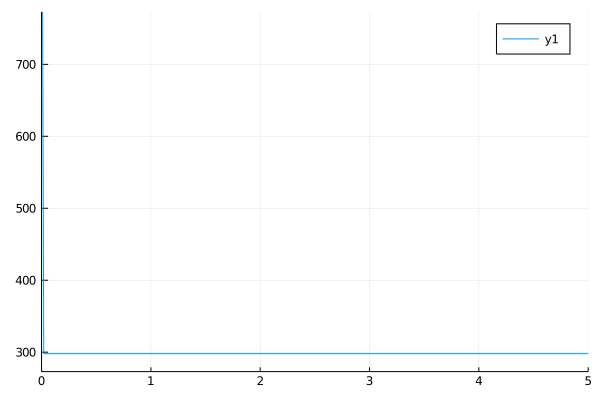

In [5]:
using Plots
anim = @animate for n in range(1, Nt, step = 1)
    plot(range(Δx*1000,L*1000,length = Nx), view(result,n,:),
    ylims = (273,773),
    xlims = (0,5))
end

 gif(anim, "陰解法.gif", fps=60)


行列を作る部分で若干コードが増えました。  
描画するアニメーションは陽解法も陰解法も条件を一応そろえてあります。  
違いがないことを確認してください。  
  
  
行列を使う影響で使用メモリ量も増えています。  
下記はNt,Nxを揃えた場合の、計算時間とメモリ使用量です。  
陽解法
```
(Nt, Nx) = (5000, 50)
(init_temp, boundary_temp_left, boundary_temp_right) = (773.0, 773.0, 773.0)
  0.088622 seconds (282.52 k allocations: 17.094 MiB)
```
陰解法  
``` 
(Nt, Nx) = (5000, 50)
(init_temp, boundary_temp_left, boundary_temp_right) = (773.0, 773.0, 298.0)
  4.206801 seconds (20.09 k allocations: 104.528 MiB, 0.26% gc time)
```  
  
一方で、陰解法は無条件安定なのでNt、Nx を独立に細かくとることができ、  
より正確な把握が可能です。  
さらに陽解法の安定条件は次元数が増えればなおきつくなります。  
よって現在の主流は陰解法です。  
  
どうでしょうか。計算の考え方、コーディング、少しは  
伝わったでしょうか。
自分で説明を作りながらコーディングしたことで、  
僕自身の考えも明瞭になりました。  
継続してやっていきたいと思っています。  

次回クランクニコルソン法でのコーディングを行います。  
